In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

In [2]:
from sklearn import metrics
import seaborn as sns
import seaborn as sn 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier



In [3]:
# Load data
df = pd.read_csv('Titanic-Dataset.csv')  # Specify the path to your file
df.info()
df.tail(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [4]:
# Drop unnecessary columns
final_data = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], errors='ignore')

#f  Fill missing values
if 'Age' in final_data.columns:
    final_data['Age'] = final_data['Age'].fillna(150)
if 'Embarked' in final_data.columns:
    final_data['Embarked'] = final_data['Embarked'].fillna(final_data['Embarked'].mode()[0])

In [5]:
print( final_data['Age'])
columns = [col for col in final_data.columns]



0       22.0
1       38.0
2       26.0
3       35.0
4       35.0
       ...  
886     27.0
887     19.0
888    150.0
889     26.0
890     32.0
Name: Age, Length: 891, dtype: float64


In [6]:
for col in columns:
    print("\n",final_data[col].value_counts(),"\n")


 Survived
0    549
1    342
Name: count, dtype: int64 


 Pclass
3    491
1    216
2    184
Name: count, dtype: int64 


 Sex
male      577
female    314
Name: count, dtype: int64 


 Age
150.00    177
24.00      30
22.00      27
18.00      26
28.00      25
         ... 
24.50       1
0.67        1
0.42        1
34.50       1
74.00       1
Name: count, Length: 89, dtype: int64 


 SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64 


 Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64 


 Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
13.8583     1
50.4958     1
5.0000      1
9.8458      1
10.5167     1
Name: count, Length: 248, dtype: int64 


 Embarked
S    646
C    168
Q     77
Name: count, dtype: int64 



In [7]:
print(final_data['Age'].unique())

[ 22.    38.    26.    35.   150.    54.     2.    27.    14.     4.
  58.    20.    39.    55.    31.    34.    15.    28.     8.    19.
  40.    66.    42.    21.    18.     3.     7.    49.    29.    65.
  28.5    5.    11.    45.    17.    32.    16.    25.     0.83  30.
  33.    23.    24.    46.    59.    71.    37.    47.    14.5   70.5
  32.5   12.     9.    36.5   51.    55.5   40.5   44.     1.    61.
  56.    50.    36.    45.5   20.5   62.    41.    52.    63.    23.5
   0.92  43.    60.    10.    64.    13.    48.     0.75  53.    57.
  80.    70.    24.5    6.     0.67  30.5    0.42  34.5   74.  ]


In [8]:
missing_age=final_data[final_data['Age'] == 150]

In [9]:
print(final_data['Age'].describe())

count    891.000000
mean      53.597273
std       49.754279
min        0.420000
25%       22.000000
50%       32.000000
75%       54.000000
max      150.000000
Name: Age, dtype: float64


In [10]:
print(missing_age)

     Survived  Pclass     Sex    Age  SibSp  Parch     Fare Embarked
5           0       3    male  150.0      0      0   8.4583        Q
17          1       2    male  150.0      0      0  13.0000        S
19          1       3  female  150.0      0      0   7.2250        C
26          0       3    male  150.0      0      0   7.2250        C
28          1       3  female  150.0      0      0   7.8792        Q
..        ...     ...     ...    ...    ...    ...      ...      ...
859         0       3    male  150.0      0      0   7.2292        C
863         0       3  female  150.0      8      2  69.5500        S
868         0       3    male  150.0      0      0   9.5000        S
878         0       3    male  150.0      0      0   7.8958        S
888         0       3  female  150.0      1      2  23.4500        S

[177 rows x 8 columns]


In [11]:
fare_stats = missing_age["Fare"].describe()
fare_stats

count    177.000000
mean      22.158567
std       31.874608
min        0.000000
25%        7.750000
50%        8.050000
75%       24.150000
max      227.525000
Name: Fare, dtype: float64

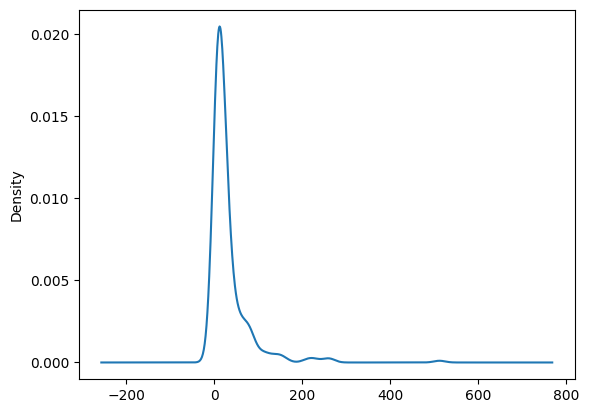

In [14]:
final_data.Fare.plot.kde();

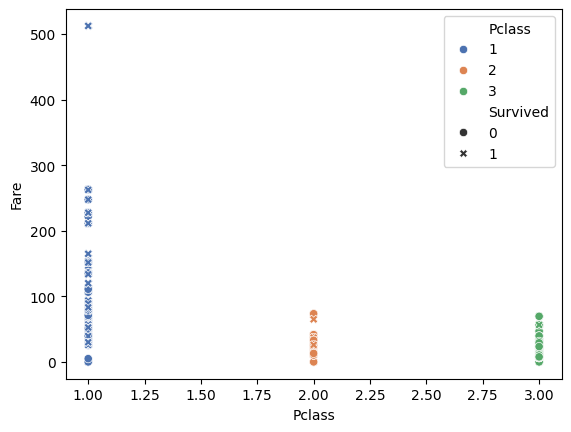

In [15]:
sns.scatterplot(x = "Pclass", y = "Fare", hue="Pclass",style = "Survived",palette= 'deep', data = final_data);

C:\Users\shvve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 52.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\shvve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 58.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\shvve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 55.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


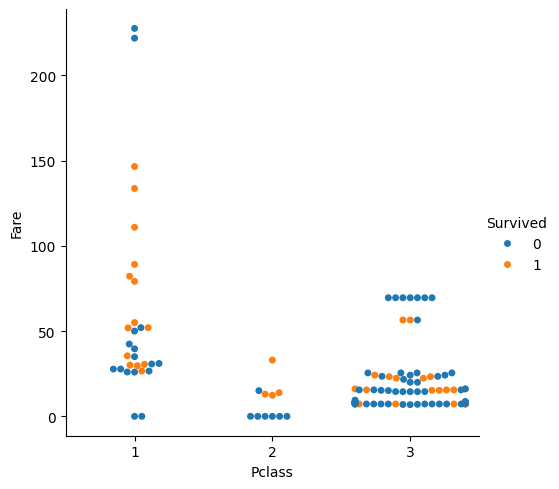

In [16]:
sns.catplot(data=missing_age, kind="swarm", x="Pclass", y="Fare", hue="Survived")

In [21]:
age_counts = missing_age['Pclass'].value_counts()
print(age_counts)

Pclass
3    136
1     30
2     11
Name: count, dtype: int64


In [24]:
survived_counts = missing_age['Survived'].value_counts()
print(survived_counts)

Survived
0    125
1     52
Name: count, dtype: int64


In [28]:
survived_by_class = missing_age.groupby('Pclass')['Survived'].sum()

print(survived_by_class/age_counts*100)

Pclass
1    46.666667
2    36.363636
3    25.000000
dtype: float64


ZERO Fare investigations 

In [29]:
print( final_data['Fare'])
columns = [col for col in final_data.columns]

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64


In [45]:
print(final_data['Fare'].describe())
zero_count = (final_data['Fare'] <= 4).sum()
zero_count1 = (missing_age['Fare'] <= 4).sum()
print(zero_count, zero_count1)

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64
15 8


In [46]:
survival_counts = final_data.groupby('Sex')['Survived'].value_counts(normalize=True)
print(survival_counts)

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: proportion, dtype: float64


In [48]:
survival_counts = final_data.groupby('Pclass')['Survived'].value_counts(normalize=True)
print(survival_counts)

Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: proportion, dtype: float64


In [49]:
survival_counts = final_data.groupby(['Pclass', 'Sex'])['Survived'].value_counts(normalize=True) * 100
print(survival_counts)

Pclass  Sex     Survived
1       female  1           96.808511
                0            3.191489
        male    0           63.114754
                1           36.885246
2       female  1           92.105263
                0            7.894737
        male    0           84.259259
                1           15.740741
3       female  0           50.000000
                1           50.000000
        male    0           86.455331
                1           13.544669
Name: proportion, dtype: float64
